# 1.Import the necessary libraries

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


# 2. Read the data as a data frame

In [201]:

Data  = pd.read_csv('insurance.csv') # Import the dataset named 'insurance.csv'
Data.head()  # view the first 5 rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. a.Shape of the data

In [8]:
Data.shape  ## see the shape of the data 
# **There are 1338 Observations / Rows and 7 Attributes / Columns.**

(1338, 7)

# 3.b.Data type of each attribute

In [9]:
Data.info() # To see the data type of each of the variable, number of values entered in each of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 3.c.Checking the presence of missing values

In [60]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(Data)

,Total,Percent
charges,0,0.0
region,0,0.0
smoker,0,0.0
children,0,0.0
bmi,0,0.0
sex,0,0.0
age,0,0.0


In [235]:
##based on above table, there are no missing values in given data

# 3.d. 5 point summary of numerical attributes

In [14]:
Data.describe() ##the output results provide the five number summary of the data.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3.e.Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

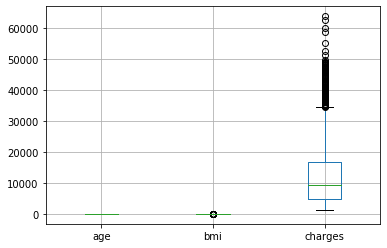

In [205]:
Data.boxplot(column=['age','bmi','charges']) ## all three column are shown in one plot using boxplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018574E48>,
      dtype=object)

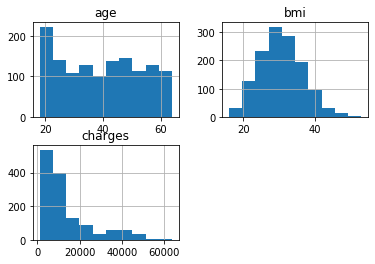

In [57]:
Data.hist(column=['age','bmi','charges']) ## Showing distribution using histogram 

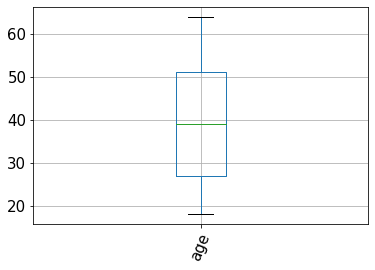

In [37]:
Data.boxplot(column='age',grid=True, rot=68, fontsize=15)  ## box plot for age column 

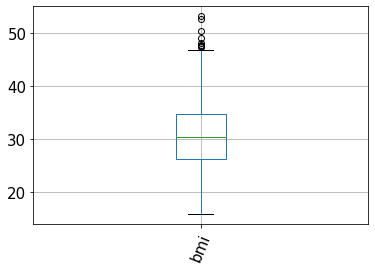

In [38]:
Data.boxplot(column='bmi',grid=True, rot=68, fontsize=15) ##box plot for bmi column

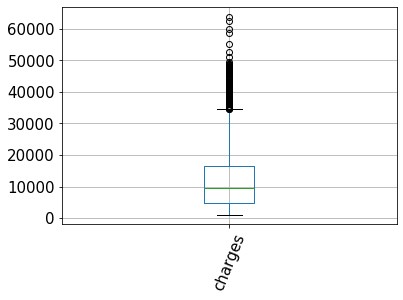

In [206]:
 
Data.boxplot(column=['charges'],grid=True, rot=68, fontsize=15)  ##box plot for charges column

# 3.f.Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [47]:
Data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


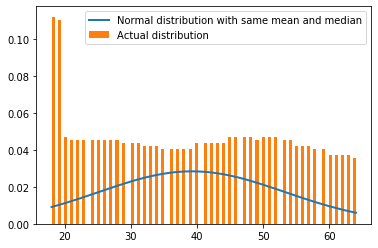

In [237]:

## for age::
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(Data['age'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [236]:
##for bmi

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


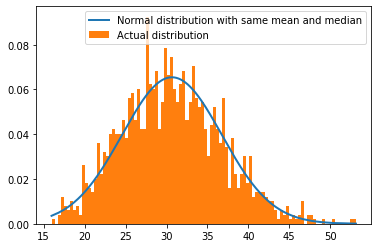

In [52]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(Data['bmi'])
h = sorted(h)
 
#use the scipy stats 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


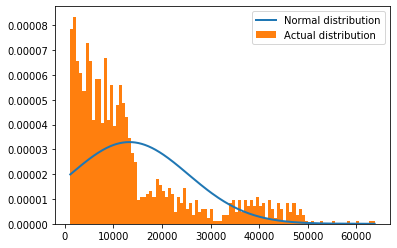

In [238]:
#for charges
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(Data['charges'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

## below plot shows it is right skewed  and  we can see that ::mean > median

# 3.g.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

In [230]:
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


In [239]:
np.where((Data < (Q1 - 1.5 * IQR)) | (Data > (Q3 + 1.5 * IQR)))

(array([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,   55,
          82,   84,   86,   94,  109,  116,  123,  146,  158,  161,  175,
         185,  203,  223,  240,  242,  251,  252,  254,  256,  263,  265,
         271,  281,  286,  288,  292,  298,  312,  314,  322,  327,  328,
         330,  338,  373,  377,  381,  401,  420,  421,  422,  441,  476,
         488,  500,  524,  530,  543,  543,  549,  558,  569,  577,  587,
         609,  615,  621,  623,  629,  665,  667,  668,  674,  677,  682,
         689,  697,  706,  725,  736,  738,  739,  742,  759,  803,  819,
         826,  828,  842,  845,  847,  850,  852,  856,  860,  860,  883,
         893,  901,  917,  947,  951,  953,  956,  958, 1012, 1021, 1022,
        1031, 1036, 1037, 1047, 1047, 1049, 1062, 1070, 1078, 1088, 1090,
        1096, 1111, 1117, 1118, 1122, 1124, 1139, 1146, 1152, 1156, 1186,
        1206, 1207, 1218, 1230, 1240, 1241, 1249, 1284, 1288, 1291, 1300,
        1301, 1303, 1313, 1317, 1323],

In [240]:
## We check outliers using box plot 

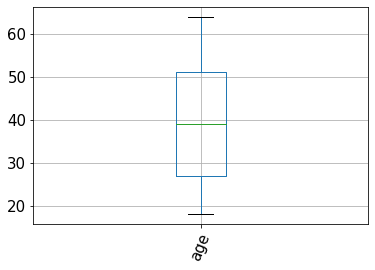

In [222]:
Data.boxplot(column='age',grid=True, rot=68, fontsize=15)  ## No outliers 

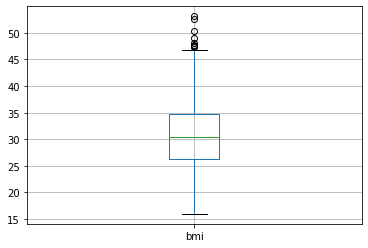

In [224]:
Data.boxplot(column='bmi',grid=True) ## there are outliers in bmi column after >45 

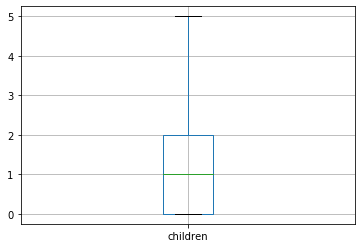

In [226]:
Data.boxplot(column='children',grid=True) ## No outliers

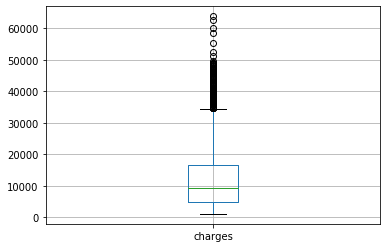

In [227]:
Data.boxplot(column='charges',grid=True) ## there are outliers in charges column after >30000 

In [213]:
  Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 4.b.Does bmi of males differ significantly from that of females?

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


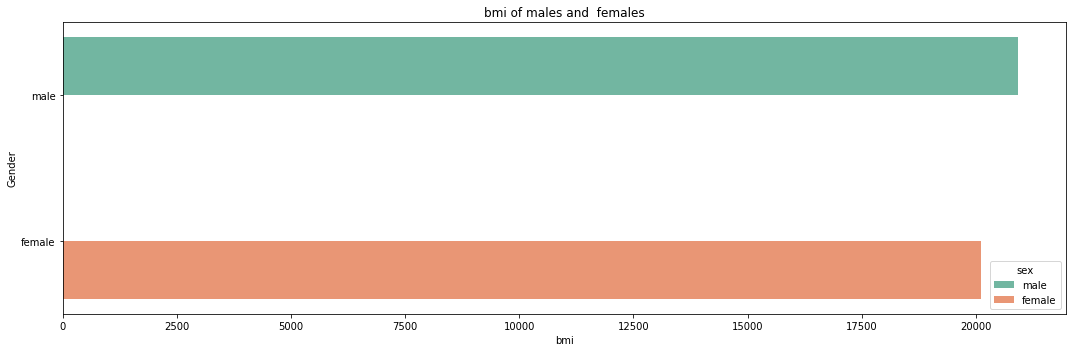

In [175]:
suic_sum_m = Data['bmi'].groupby([Data['sex']]).sum()  # number of suicides by country and sex
suic_sum_m = suic_sum_m.reset_index().sort_index(by='bmi',ascending=False) # sort in descending order
most_cont_m = suic_sum_m.head(10)  # getting the top ten countries in terms of suicides

fig = plt.figure(figsize=(15,5))
plt.title('bmi of males and  females')

sns.barplot(y='sex',x='bmi',hue='sex',data=most_cont_m,palette='Set2');

plt.ylabel('Gender')
plt.tight_layout()


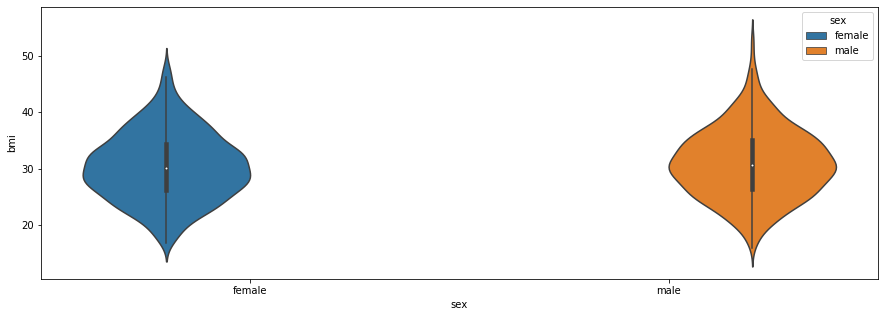

In [182]:
plt.figure(figsize=(15,5))

sns.violinplot(y="bmi", x="sex", hue = 'sex',  data=Data)
plt.show()

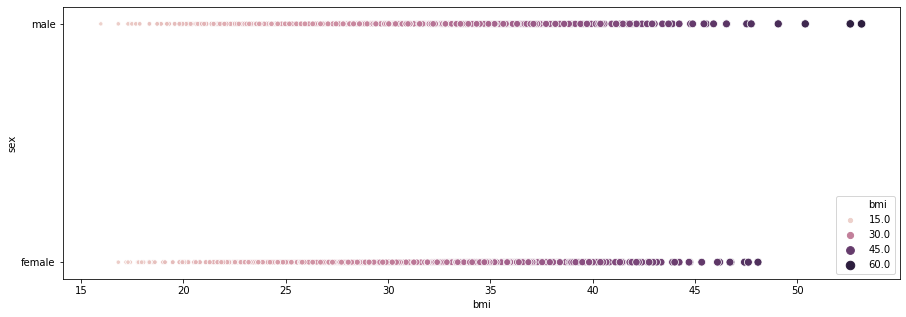

In [130]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(y='sex',x='bmi', data=Data, hue = "bmi", size='bmi', legend='brief') # scatter plot

In [241]:
## based on above plots BMI of males doesn't differ significantly from that of females

# 4.a.Do charges of people who smoke differ significantly from the people who don't?

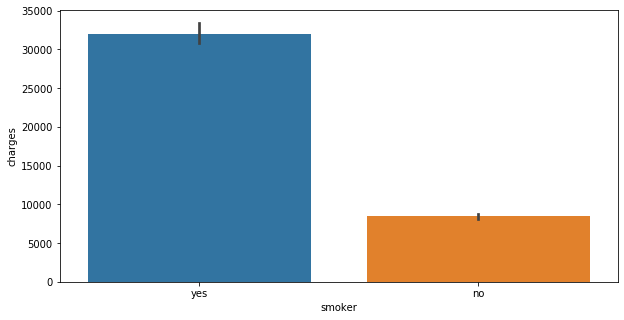

In [92]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='smoker', y='charges', data=Data)  # barplot

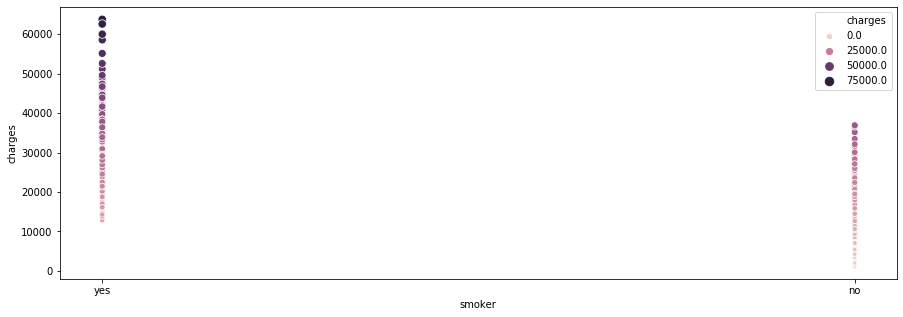

In [132]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x='smoker',y='charges', data=Data, hue = "charges", size='charges', legend='brief') # scatter plot

In [ ]:
## bases on above plots, charges of people who smoke differ significantly from the people who don't.

# 4.d. Is the distribution of bmi across women with no children, one child and two children, the same?

<Figure size 1080x360 with 0 Axes>

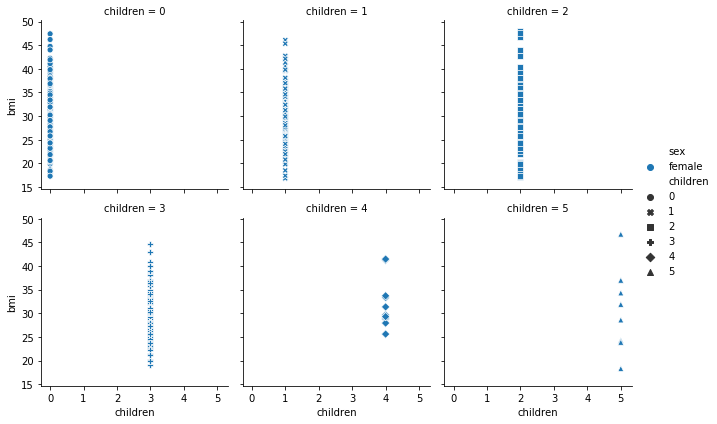

In [114]:
figure = plt.figure(figsize=(15,5))
sns.relplot(x='children', y='bmi', data=Data.query("sex =='female'"), hue='sex', col='children',style='children',sizes=(15,200),col_wrap=3, height=3)

In [ ]:
# based on above plots,the distribution of bmi across women with no children, one child and two children, the same.

In [115]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 4.c.Is the proportion of smokers significantly different in different genders

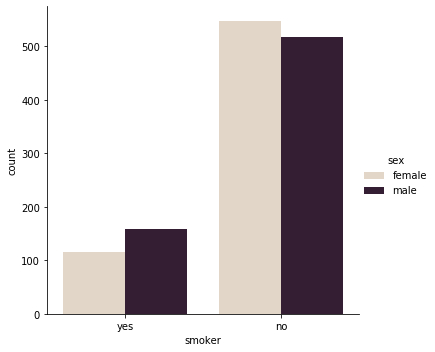

In [233]:
sns.catplot(x="smoker", kind="count",hue='sex' ,palette="ch:.25", data=Data);

In [234]:
## based on above plots their is no significantly proportion of smokers different in different genders

# 3.h.Distribution of categorical columns (include children)

In [138]:
Data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


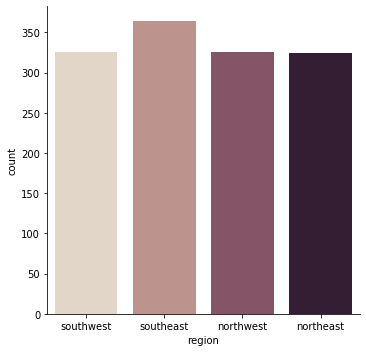

In [228]:
sns.catplot(x="region", kind="count" ,palette="ch:.25", data=Data); ## for categorical Column: region

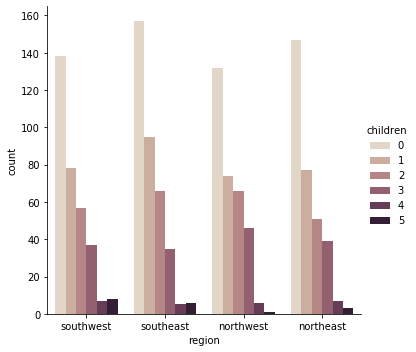

In [162]:
sns.catplot(x="region", kind="count",hue='children' ,palette="ch:.25", data=Data);##for categorical Column: region with respect to childrens

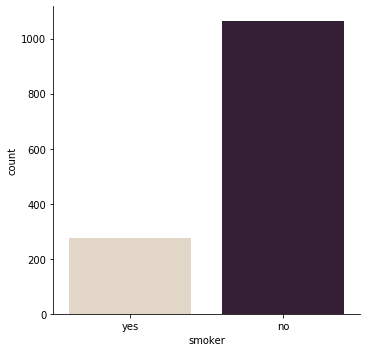

In [167]:
sns.catplot(x="smoker", kind="count" ,palette="ch:.25", data=Data);##for categorical Column: smoker

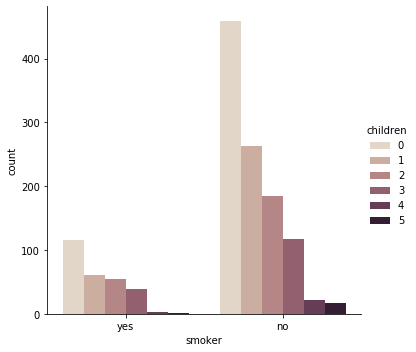

In [161]:
sns.catplot(x="smoker", kind="count",hue='children' ,palette="ch:.25", data=Data); ##for categorical column, smoker with respect to childrens

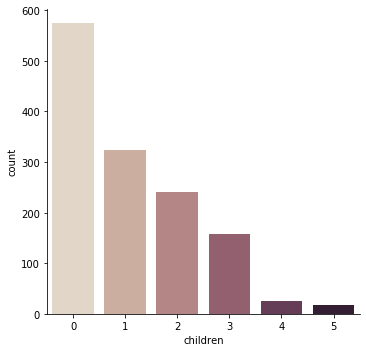

In [157]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=Data); ###for Column: childern

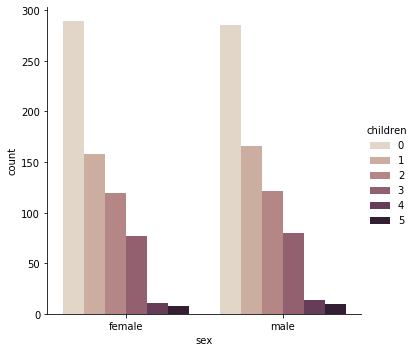

In [159]:
sns.catplot(x="sex", kind="count",hue='children', palette="ch:.25", data=Data); ###for categorical Column: sex with respect to childrens

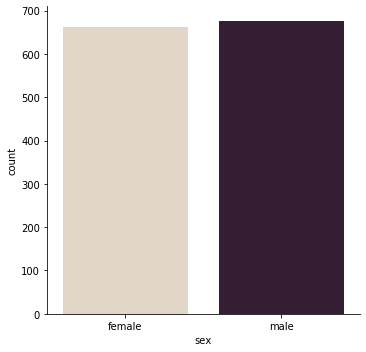

In [166]:
sns.catplot(x="sex", kind="count" ,palette="ch:.25", data=Data);##for categorical Column: sex

# 3.i.Pair plot that includes all the columns of the data frame

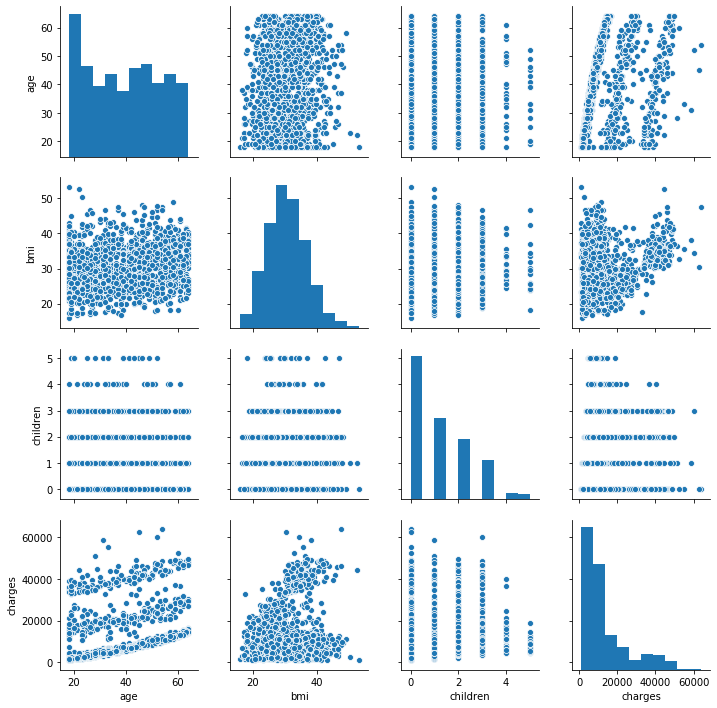

In [229]:
sns.pairplot(Data) ## including all columns  diagonals  are histograms wih respect to itself and other plots are scatter plots  

##